<a href="https://colab.research.google.com/github/Ibtasam-98/machine-learning/blob/main/Iris_flower_classficiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Nearest Neighbors
Simple supervised machine learning algorithm used for both classification and regression tasks.

#Understanding KNN
The core idea behind KNN is that similar data points tend to exist in close proximity. When you want to classify a new, unseen data point, KNN looks at its 'K' nearest neighbors (the closest data points) in the training dataset.



*   For Classification: The new data point is assigned the class that is most common among its 'K' nearest neighbors (a "majority vote").
*   For Regression: The new data point is assigned the average (or median) value of its 'K' nearest neighbors.

The "distance" between data points is usually calculated using metrics like Euclidean distance, though others like Manhattan distance can also be used.





# Load Libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


print("libraries Imported Succesfully!")


libraries Imported Succesfully!


#Load Iris Dataset

In [ ]:
iris = load_iris()

X = iris.data # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target (species: 0-setosa, 1-versicolor, 2-virginica)

feature_names = iris.feature_names
target_names = iris.target_names


print("\nIris dataset loaded.")
print("Features (X Shape)", X.shape)
print("Target (y Shape)", y.shape)
print(f"Feature names: {feature_names}")
print(f"Target names: {target_names}")



Iris dataset loaded.
Features (X Shape) (150, 4)
Target (y Shape) (150,)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


# Dataframe

In [ ]:
df = pd.DataFrame(X,columns=feature_names)
print(df)

df['species'] = y
print(y)

df['species_name'] = df['species'].map({0: target_names[0], 1: target_names[1], 2: target_names[2]})

print("\nFirst 5 rows of the DataFrame:")
print(df.head())

print("\nDescription of the dataset:")
print(df.describe())

print("\nSpecies distribution:")
print(df['species_name'].value_counts())


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

# Data Exploration & Visualization

<Figure size 1000x800 with 0 Axes>

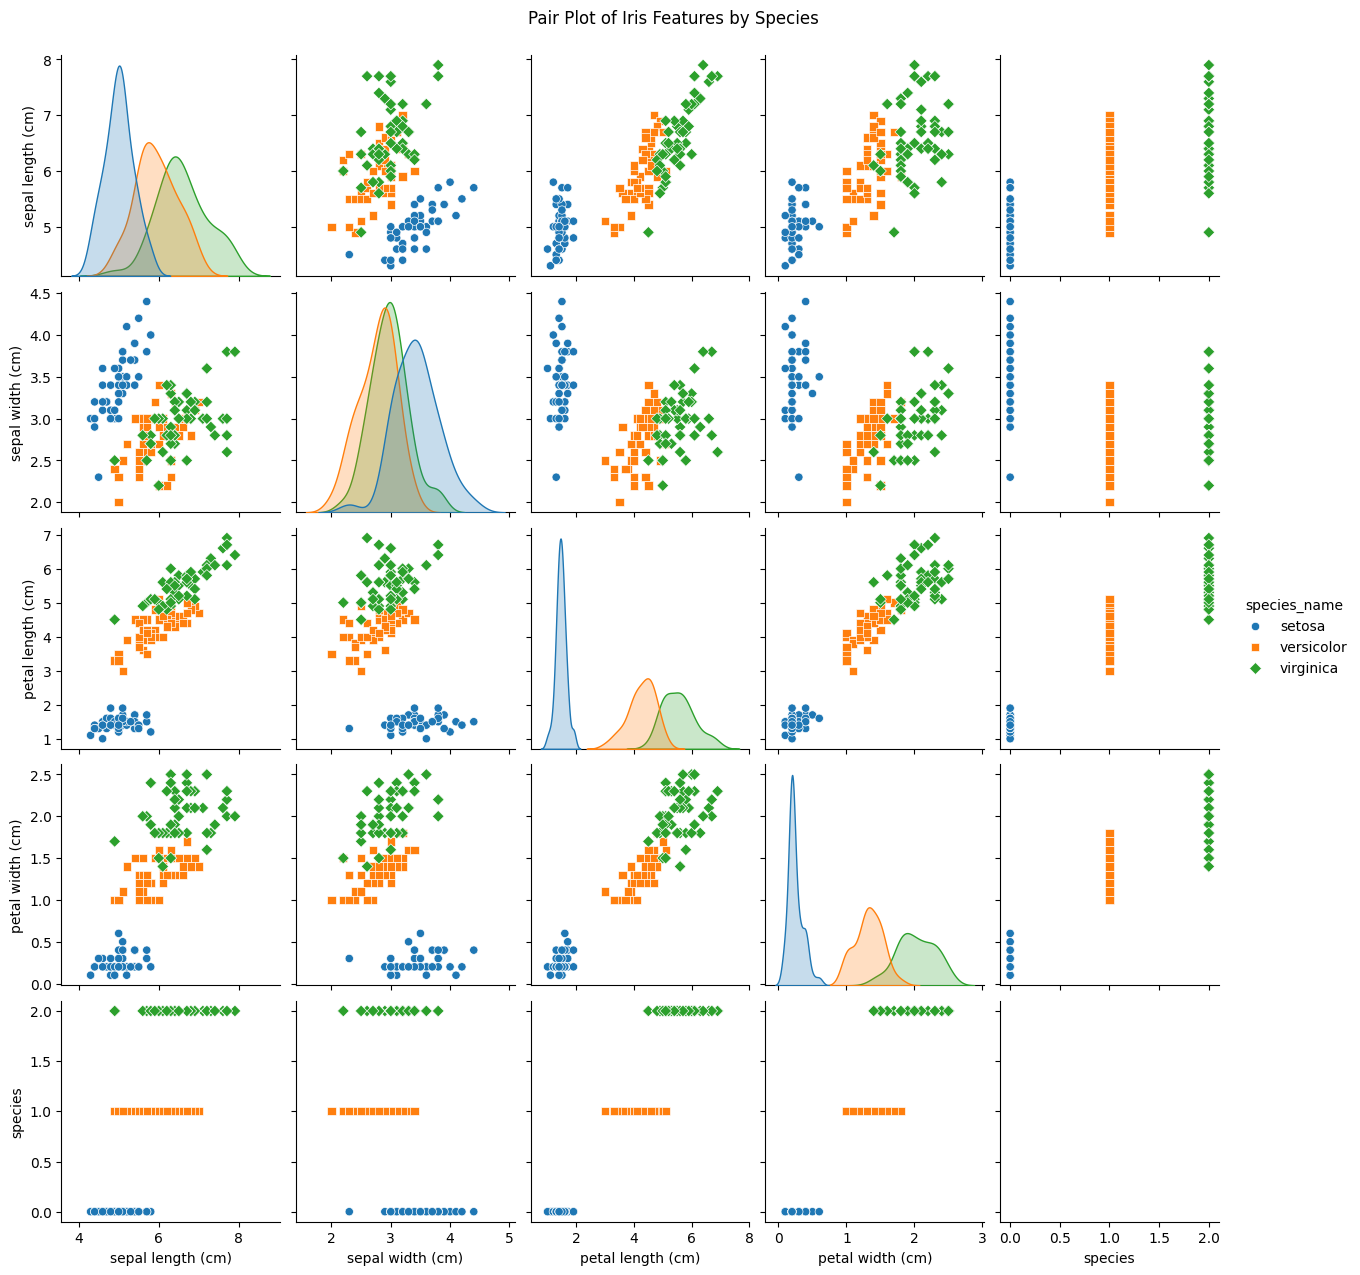

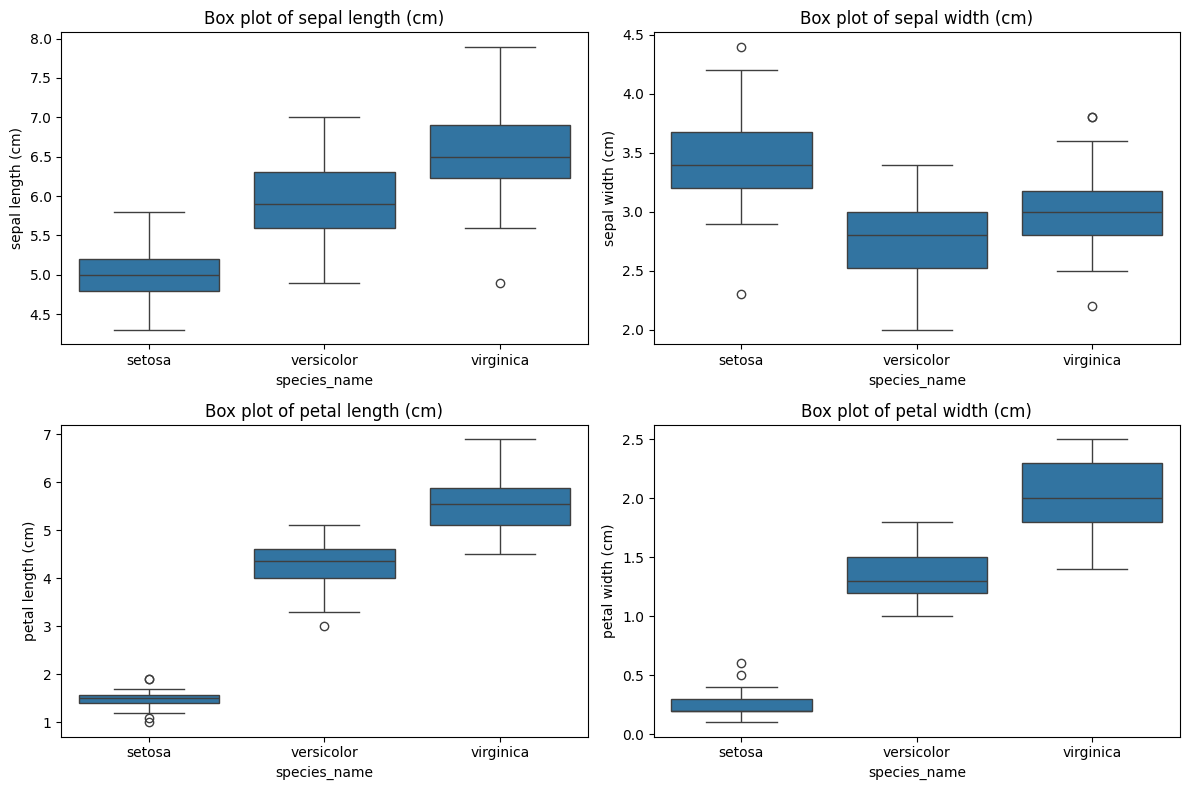

In [ ]:
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='species_name', markers=["o", "s", "D"])
plt.suptitle('Pair Plot of Iris Features by Species', y=1.02) # Adjust title position
plt.show()

# Box plots for each feature by species
plt.figure(figsize=(12, 8))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i + 1) # 2 rows, 2 columns, i+1-th plot
    sns.boxplot(x='species_name', y=feature, data=df)
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()



# Split the data into training and testing sets

In [ ]:
# We use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, )

print(f"\nTraining set features (X_train) shape: {X_train.shape}")
print(f"Testing set features (X_test) shape: {X_test.shape}")
print(f"Training set target (y_train) shape: {y_train.shape}")
print(f"Testing set target (y_test) shape: {y_test.shape}")


Training set features (X_train) shape: (120, 4)
Testing set features (X_test) shape: (30, 4)
Training set target (y_train) shape: (120,)
Testing set target (y_test) shape: (30,)


# Model Training

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
print("\nTraining the K-Nearest Neighbors model...")
knn.fit(X_train, y_train)
print("Model training complete.")



Training the K-Nearest Neighbors model...
Model training complete.


# Evaluate and prediction


[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


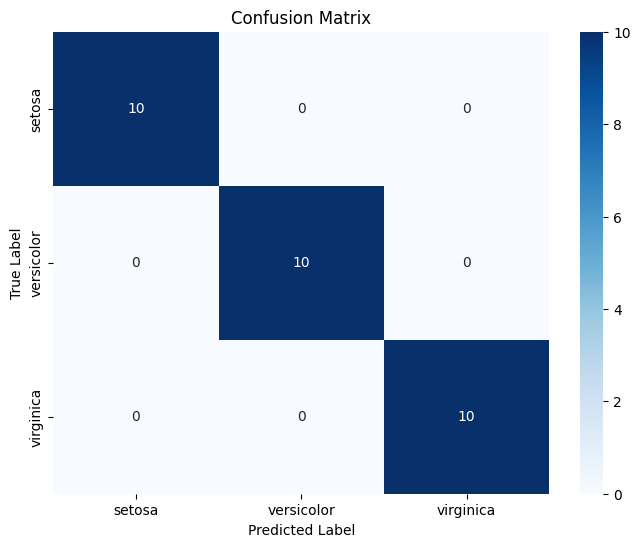

In [ ]:
# Make predictions on the test set
y_pred = knn.predict(X_test)
print(y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display a classification report (precision, recall, f1-score for each class)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


